This file is for collecting traces of Kyber in pqm4 implementation.

In [1]:
SCOPETYPE = 'OPENADC'
PLATFORM = 'CW308_STM32F4'
SS_VER = 'SS_VER_1_1'

In [2]:
%run "../jupyter/Setup_Scripts/Setup_Generic.ipynb"

INFO: Found ChipWhisperer😍


In [3]:
%%bash -s "$PLATFORM" "$SS_VER"
cd ../tracescapture/kyber-clean
make PLATFORM=$1 CRYPTO_TARGET=NONE SS_VER=$2

SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
make[1]: '.dep' is up to date.
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
.
Welcome to another exciting ChipWhisperer target build!!
arm-none-eabi-gcc (15:10.3-2021.07-4) 10.3.1 20210621 (release)
Copyright (C) 2020 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

.
Compiling:
-en     cbd.c ...
-e Done!
.
Compiling:
-en     fips202.c ...
-e Done!
.
Compiling:
-en     indcpa.c ...
-e Done!
.
Compiling:
-en     kem.c ...
-e Done!
.
Compiling:
-en     main.c ...
-e Done!
.
Compiling:
-en     ntt.c ...
-e Done!
.
Compiling:
-en     poly.c ...
-e Done!
.
Compiling:
-en     polyvec.c ...
-e Done!
.
Compiling:
-en     randombytes.c ...
-e Done!
.
Compiling:
-en     reduce.c ...
-e Done!
.
Compiling:
-en     symmetric-shake.c ...
-e Done!
.
Compiling:
-en  

In file included from ../../hardware/victims/firmware/./hal/stm32f4/stm32f4_hal.c:3:
../../hardware/victims/firmware/./hal/stm32f4/stm32f4_hal_lowlevel.h:108: warning: "STM32F415xx" redefined
  108 | #define STM32F415xx
      | 
<command-line>: note: this is the location of the previous definition


-e Done!
.
Compiling:
-en     ../../hardware/victims/firmware/./hal/stm32f4/stm32f4_hal_lowlevel.c ...


In file included from ../../hardware/victims/firmware/./hal/stm32f4/stm32f4_hal_lowlevel.c:39:
../../hardware/victims/firmware/./hal/stm32f4/stm32f4_hal_lowlevel.h:108: warning: "STM32F415xx" redefined
  108 | #define STM32F415xx
      | 
<command-line>: note: this is the location of the previous definition


-e Done!
.
Compiling:
-en     ../../hardware/victims/firmware/./hal/stm32f4/stm32f4_sysmem.c ...
-e Done!
.
Compiling:
-en     ../../hardware/victims/firmware/./hal/stm32f4/stm32f4xx_hal_rng.c ...
-e Done!
.
Assembling: ../../hardware/victims/firmware/./hal/stm32f4/stm32f4_startup.S
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I. -x assembler-with-cpp -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -DF_CPU=7372800 -Wa,-gstabs,-adhlns=objdir-CW308_STM32F4/stm32f4_startup.lst -I../../hardware/victims/firmware/./simpleserial/ -I../../hardware/victims/firmware/./simpleserial/ -I../../hardware/victims/firmware/./hal -I../../hardware/victims/firmware/./hal/stm32f4 -I../../hardware/victims/firmware/./hal/stm32f4/CMSIS -I../../hardware/victims/firmware/./hal/stm32f4/CMSIS/core -I../../hardware/victims/firmware/./hal/stm32f4/CMSIS/device -I../../hardware/victims/firmware/./hal/stm32f4/Legacy -I../../hardware/victims/firmware/./crypto/ ../../hardware/victims/firmware/./hal/stm32f4/stm32

In [4]:
cw.program_target(scope, prog, "../tracescapture/kyber-clean/simple-test-{}.hex".format(PLATFORM))

Detected known STMF32: STM32F40xxx/41xxx
Extended erase (0x44), this can take ten seconds or more
Attempting to program 36863 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 36863 bytes


In [5]:
import ctypes

from picosdk.ps5000a import ps5000a as ps
import matplotlib.pyplot as plt
from picosdk.functions import adc2mV, assert_pico_ok, mV2adc

# Create chandle and status ready for use
chandle = ctypes.c_int16()
status = {}

# Open 5000 series PicoScope
# Resolution set to 12 Bit
# 设置示波器的BIT，默认为12BIT
resolution =ps.PS5000A_DEVICE_RESOLUTION["PS5000A_DR_12BIT"]
# Returns handle to chandle for use in future API functions
status["openunit"] = ps.ps5000aOpenUnit(ctypes.byref(chandle), None, resolution)

try:
    assert_pico_ok(status["openunit"])
except: # PicoNotOkError:
    powerStatus = status["openunit"]
    if powerStatus == 286:
        status["changePowerSource"] = ps.ps5000aChangePowerSource(chandle, powerStatus)
    elif powerStatus == 282:
        status["changePowerSource"] = ps.ps5000aChangePowerSource(chandle, powerStatus)
    else:
        raise
    assert_pico_ok(status["changePowerSource"])

In [6]:
# Set up channel A
# handle = chandle

channel = ps.PS5000A_CHANNEL["PS5000A_CHANNEL_A"]
# enabled = 1
coupling_type = ps.PS5000A_COUPLING["PS5000A_DC"]
chARange = ps.PS5000A_RANGE["PS5000A_20V"]
# analogue offset = 0 V
status["setChA"] = ps.ps5000aSetChannel(chandle, channel, 1, coupling_type, chARange, 0)
assert_pico_ok(status["setChA"])

# Set up channel B
# handle = chandle
channel = ps.PS5000A_CHANNEL["PS5000A_CHANNEL_B"]
# enabled = 1

coupling_type2 = ps.PS5000A_COUPLING["PS5000A_AC"]
#chBRange = ps.PS5000A_RANGE["PS5000A_2V"]
chBRange = ps.PS5000A_RANGE["PS5000A_50MV"]
# analogue offset = 0 V
status["setChB"] = ps.ps5000aSetChannel(chandle, channel, 1, coupling_type2, chBRange, 0)
assert_pico_ok(status["setChB"])

# find maximum ADC count value
# handle = chandle
# pointer to value = ctypes.byref(maxADC)
maxADC = ctypes.c_int16()
status["maximumValue"] = ps.ps5000aMaximumValue(chandle, ctypes.byref(maxADC))
assert_pico_ok(status["maximumValue"])

# Set up single trigger
# handle = chandle
# enabled = 1
source = ps.PS5000A_CHANNEL["PS5000A_CHANNEL_A"]
threshold = int(mV2adc(300,chARange, maxADC))
# direction = PS5000A_RISING = 2
# delay = 0 s
# auto Trigger = 1000 ms
#status["trigger"] = ps.ps5000aSetSimpleTrigger(chandle, 1, source, threshold, 2, 0, 1000)
status["trigger"] = ps.ps5000aSetSimpleTrigger(chandle, 1, source, threshold, 2, 0, 0)

assert_pico_ok(status["trigger"])


# Set number of pre and post trigger samples to be collected
#####################参数###############################################
preTriggerSamples = 0

# postTriggerSamples = 46000
postTriggerSamples = 228000
#####################################################################
maxSamples = preTriggerSamples + postTriggerSamples

# Get timebase information
# Warning: When using this example it may not be possible to access all Timebases as all channels are enabled by default when opening the scope.  
# To access these Timebases, set any unused analogue channels to off.
# handle = chandle

#####################参数#############################
#timebase = 8
timebase = 10
######################################################
#timebase = 8  , 20.8 MHZ
# noSamples = maxSamples
# pointer to timeIntervalNanoseconds = ctypes.byref(timeIntervalns)
# pointer to maxSamples = ctypes.byref(returnedMaxSamples)
# segment index = 0
timeIntervalns = ctypes.c_float()
returnedMaxSamples = ctypes.c_int32()
status["getTimebase2"] = ps.ps5000aGetTimebase2(chandle, timebase, maxSamples, ctypes.byref(timeIntervalns), ctypes.byref(returnedMaxSamples), 0)
assert_pico_ok(status["getTimebase2"])

In [7]:
from tqdm import tnrange
from tqdm.auto import tqdm
import gc
import numpy as np
import sys
sys.path.append(r"D:\Github\kyber-py")
import unittest
import os
from kyber import Kyber512
from aes256_ctr_drbg import AES256_CTR_DRBG

pk,sk = Kyber512.keygen()
print(pk)

b'\x9e\x92\x10\xfd\xb6\x15)Id\xc4\xca9\xeb\x08]Yt\x9f\xa7:V\xafT\x17i\x0bs"\x01J/I\x13\xba\xd3\x1f\x8dQx\x8b\xf3\x8e\xb7\x1bJ!S\x03k\x12pM\xd8\x1d\x82\xb4\x11\xca\x89U\xd5l\x81f\x18@%\xb3\x10\x8a\xda\xa06\x13\x84\xf8\x18*\xd3WW.\xf1\n>\xcb\xca\x0b\x18\xb5\xbar\nw4X\x01\xe0}O\x028Kz\x93\xe4!\x800 \x1d\xe2PF\xab\xba>\xbb\xe5\xcb9\x83\xcfm\xba\x00\xec\xc3\xb4\x8c4h{\x88\xb9\xbdh%\xc4\xc2\x7f\xa8\xf7\x87i\x9b\x1c\xce\xbbC\x99\x84\xc7H\xd98\xb9\x94\xbfhh5\xaa\'\x8f\x07r\'{\xe10\xa8\xa4\xb4}\xb1\xa1\xb2*\x16qxAO\x04\x1d\x8c[\xa5\xc8K>\n\xb14L\xe2\x91.\xeco\x11\xc5\x0ewWcz\x06{\xdb\xd7d\xcbF:\x16\xc1W\xa81j\xdabF.\x92\xa4\xf6\x91\xa6a|1x\xe5\xad\xaew=\xc9\x90\x04\x1d\x87p\x8fS\x19\xd4\x1b\xba\xd0\x91s,\xd2\x91\t\x88\x8d\xbe\xa0\xb8\x04H<k3w\xe5\xd27\xc7\xf2^~\xc4\x84\xd5\x14~\x85W\x8c}h\xae\x0b\xa7W\xb5\x1c\xc7\x95\x94"jeN\xe7wo\x18T\x92d\xa2\xc1\x11\x07m\xab\xac\x00c\xec\x1e\xd0\x14\xc0\xf2{\xbe\xaf\xb8\xb8\xa7\xa6\ne\xa7\xbb^\x98\xae q\x93\x1f9\x85\xda!\x93\xa4\x99\xcb\xb6`\x8bsz\xb6\x11\x9

In [8]:
import os
import random
import string

def generate_random_hex_string(length):
    return ''.join([format(random.randint(0, 15), 'x') for _ in range(length)])

def write_random_hex_strings_to_file(file_path, count):
    with open(file_path, 'w') as output_file:
        for _ in range(count):
            random_hex_string = generate_random_hex_string(64)  # 因为两位十六进制代表一位字节，所以长度除以2
            output_file.write(f"{random_hex_string}\n")

# 使用示例
output_file_name = r"D:\DCPA\kybercoins.txt"
write_random_hex_strings_to_file(output_file_name, 2000)

print(f"已成功在'{output_file_name}'文件中生成了{2000}个1280byte长度的随机字符串。")

已成功在'D:\DCPA\kybercoins.txt'文件中生成了2000个1280byte长度的随机字符串。


In [5]:
def read_hex_strings_from_file(file_path):
    with open(file_path, 'r') as input_file:
        hex_strings = [line.strip() for line in input_file]
    return hex_strings

# 使用示例
input_file_name = r"D:\DCPA\m128.txt"
hex_list = read_hex_strings_from_file(input_file_name)
input_file_name = r"D:\DCPA\m64.txt"
hex_list2 = read_hex_strings_from_file(input_file_name)
input_file_name = r"D:\DCPA\m10.txt"
hex_list3 = read_hex_strings_from_file(input_file_name)
input_file_name = r"D:\DCPA\m1280.txt"
hex_list4 = read_hex_strings_from_file(input_file_name)
input_file_name = r"D:\DCPA\kybercoins.txt"
hex_list5 = read_hex_strings_from_file(input_file_name)

In [6]:
%matplotlib notebook
import matplotlib.pylab as plt
import random

def convert_msg(m,length):
    res = []
    for j in range(0,length): 
        s = m[j*2:j*2+2]
        s = "0x" + s
        res.append(int(s,16))
        #print(s,end=',')
    
    return res

print(convert_msg("92abc33288e254a195bb5acd57330ae32d86da6c66c0740f3f846785ad8e8815",32))

[146, 171, 195, 50, 136, 226, 84, 161, 149, 187, 90, 205, 87, 51, 10, 227, 45, 134, 218, 108, 102, 192, 116, 15, 63, 132, 103, 133, 173, 142, 136, 21]


In [9]:
from tqdm import tnrange
from tqdm.auto import tqdm
import gc
import numpy as np
import sys
import os


traces_per_part = 200  # 每一块文件多少条曲线
part = 10  # 分成多少块文件
part_start_index = 0  # 序号从多少块开始。如果是初始采集，就设置为0


filename_of_traces = r"D:\DCPA\kyber\trace\cw"	# 曲线文件的文件名前缀
#infile = open(r"D:\Demonstrate\Dilithium\train\test.txt")
#infile = open(r"D:\DCPA\pre_file\test.txt")
total_traces = part * traces_per_part  # 总共要采集的曲线数目


def mainProcess(num_of_traces):

    #traces_array = np.empty(shape=(traces_per_part,maxSamples),dtype=np.float64)
    trace_array = []
    text_in_array = hex_list5
    text_out_array = []

    for index_i in tnrange(num_of_traces):
        scope.arm()
        a = convert_msg(hex_list5[index_i],32)
        #print(a)
        
        target.simpleserial_write('p',bytearray(a))
        
        ret = scope.capture()
        if ret:
            print("Target timed out!")
            continue
        
        trace_array.append(scope.get_last_trace())
        d = target.simpleserial_read('r',32,timeout = 0)
        text_out_array.append(d)
        print(d)

        
    return trace_array, text_in_array, text_out_array

for p in tnrange(part):  # 遍历所有的part
    traces_arr, text_in_arr, text_out_arr = mainProcess(traces_per_part)
    np.save(filename_of_traces + "_part{0}.npy".format(p + part_start_index), traces_arr)
    np.save(filename_of_traces + "_part{0}_coins.npy".format(p + part_start_index), text_out_arr)

C:\Users\admin\AppData\Local\Temp\ipykernel_3916\4176058253.py:47: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for p in tnrange(part):  # 遍历所有的part


  0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\admin\AppData\Local\Temp\ipykernel_3916\4176058253.py:27: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for index_i in tnrange(num_of_traces):


  0%|          | 0/200 [00:00<?, ?it/s]

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xb

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xb

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xb

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')


  0%|          | 0/200 [00:00<?, ?it/s]

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xb

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xb

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xb

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')


  0%|          | 0/200 [00:00<?, ?it/s]

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xb

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xb

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xb

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')


  0%|          | 0/200 [00:00<?, ?it/s]

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xb

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xb

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xb

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')


  0%|          | 0/200 [00:00<?, ?it/s]

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xb

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xb

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xb

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')


  0%|          | 0/200 [00:00<?, ?it/s]

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xb

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xb

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xb

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')


  0%|          | 0/200 [00:00<?, ?it/s]

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xb

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xb

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xb

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')


  0%|          | 0/200 [00:00<?, ?it/s]

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xb

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xb

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xb

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')


  0%|          | 0/200 [00:00<?, ?it/s]

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xb

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xb

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xb

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')


  0%|          | 0/200 [00:00<?, ?it/s]

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xb

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xb

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xb

bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')
bytearray(b'\xec\xfb\n\xfd\x99\xfe\x13\xfa\xd5\x05\x8e\x05\x1f\x01\xca\x00U\xffn\x02)\x06\xb6\x00\xc2\x03N\xfb>\xfa\xbc\x05')


<IPython.core.display.Javascript object>


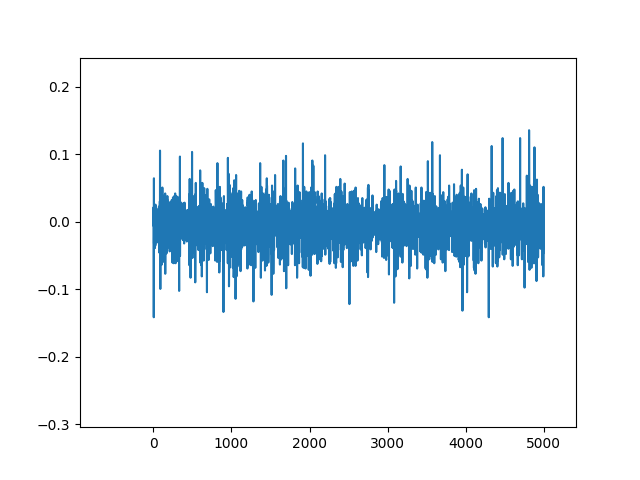

In [14]:
plt.figure()
plt.plot(traces_arr[3])

In [39]:
print(text_in_arr)

['dda8f148d4a6623202c5334af3f0e3d935c4988aec0603da6f12cf22b7af176e', '12c793d2b2f3eb85bd9a30eced795b5ad228c9e6426f10826dd28dec1fdb0c90', 'b3586e21a81adbbcecb56aa3c2ab907315e20697727da06910eca90a946eb079', '39a835c8ccebd7e16a223b515dfc5e07258f7d88dc888160f8990b6686e7b093', '874686628ff06ec04e10dffd2445ba5f2ec66f028b943714ffd8a4f22c278bf4', 'd093bc3ab4aa74fa5ea5b660d3ab5374069ee8b04d8768c5fe9f79556351eca7', 'efe2e6e8bfc486c39b3a6f9605200d18245869e2e83bb106871a2508088b2164', '7aadca79a0bef33891246d787f7241123ac8f1ca6ce60a526d5e56398beb78ea', 'a648fd6b6ab6ab2612e32924f7cda51441718ff35b11feff989eb995ab12dbd3', '174cd769a31f34f1610126edf2729ebc0f20f71a23b7577858a9eaad58f854ee', 'aa3a1b9171348c5e300918bf74927a05793ce6e25e56317be4f752f580b79f9b', 'ed68d53d563f22b63ee8c823d126c97c4529fcf5380131821c93d7ea51e6ea1f', 'c4fe8fa290d6477f61295cadf6aeb02a0dc8b7b39839c79f1515c8c7c0f66b7d', 'b3a7b7a5755800565ca548ab6f4e5c69aa88bd12a400f714dce92c0211307c76', 'f16e456e7b5716935e169a6d903e55bb985cf24b9de3a1

In [12]:
# Stop the scope
# handle = chandle
status["stop"] = ps.ps5000aStop(chandle)
assert_pico_ok(status["stop"])

# Close unit Disconnect the scope
# handle = chandle
status["close"]=ps.ps5000aCloseUnit(chandle)
assert_pico_ok(status["close"])

# display status returns
print(status)

{'openunit': 0, 'setChA': 0, 'setChB': 0, 'maximumValue': 0, 'trigger': 0, 'getTimebase2': 0, 'runBlock': 0, 'isReady': 0, 'setDataBuffersA': 0, 'setDataBuffersB': 0, 'getValues': 0, 'stop': 0, 'close': 0}
